In [1]:
import numpy as np

### Propagacja wsteczna 

Przy większej ilości wag rozpisywanie każdej pochodnej z osobna byłoby uciążliwe. Dlatego wygodniej jest stosować notację macierzową.  

Niech $X$ będzie macierzą danych o wymiarach $n \times m$, $W$ będzie macierzą wag $m \times h$ a $b$ będzie macierzą wyrazów wolnych $n \times h$. Wtedy nasz model jednowarstwowy można zapisać jako 

$$ Y = XW + b $$

$Y$ jest teraz macierzą zawierającą aktywacje $h$ neuronów dla każdej z $n$ obserwacji w zbiorze danych.

Tak zdefiniowaną warstwę nazywamy warstwą *** fully connected *** (analogicznie *** dense *** ).

Jeśli nasza sieć ma tylko tą jedną warstwę, to $Y$ jest wynikiem naszej sieci, i policzymy na nim naszą funkcję straty. 

Zadajmy sobie pytanie, które było głównym motorem napędowym perceptronu: **jak nasze wagi $W$ wpływają na funkcję straty $L$**?  

Oczywiście możemy to zrobić tak jak wcześniej - policzyć pochodną $L$ po wszystkich elementach macierzy $W$. Jednak byłoby to dosć uciążliwe - zarówno obliczeniowo, jak i pod kątem zapisu.  

Możemy zrobić to analogicznie do tego, co widzieliśmy w perceptronie - najpierw policzyć pochodną funkcji straty $L$ po $Y$, a następnie pochodną $Y$ po $W$. Wtedy, z reguły łancuchowej dostajemy:

$$ \frac{\partial L}{\partial W} =  \frac{\partial L}{\partial Y}  \frac{\partial Y}{\partial W} $$
<br>
Pochodną funkcji straty $L$ po $Y$ powinniśmy mieć "za darmo" - sami definiujemy funkcję straty, więc powinniśmy wiedzieć ile wynosi jej pochodna.

Pytanie tylko, jak obliczyć pochodną $Y$ po $W$.

Okazuje się, że różniczkowanie na takich macierzach wygląda bardzo podobnie do różniczkowania zwykłych skalarów.  
Gdyby $y$, $x$, $w$, oraz $b$ były liczbami, to moglibyśmy zapisać

$$ \frac{\partial y}{\partial w} = \frac{\partial (xw + b)}{\partial w} = x $$

Użyjmy więc tej samej notacji dla macierzy:

$$ \frac{\partial Y}{\partial W} = \frac{\partial (XW + b)}{\partial W} = X $$

Analogicznie,

$$ \frac{\partial Y}{\partial X} = \frac{\partial (XW + b)}{\partial X} = W $$

oraz

$$ \frac{\partial Y}{\partial b} = \frac{\partial (XW + b)}{\partial b} = I $$

Oczywiście, jest to dość mocne uproszczenie, ale dobrze przekłada się na intuicję wyciągniętą z analizy jednowymiarowej. Dokładniejsze uzasadnienie znajdziecie na http://cs231n.stanford.edu/vecDerivs.pdf .

W praktyce można opierać się o te wzory, dokładając ewentualnie transpozycję tak, aby zgadzały się wymiary macierzy podczas mnożenia.

Takie działanie nazywa się **metodą propagacji wstecznej** (***backpropagation***).

Mamy więc przepis, jak zbudować sieć opartą o operacje na macierzach. Spróbujmy napisać teraz kilka funkcji które to zrealizują.

### Implementacja sieci bez warstw ukrytych za pomocą notacji macierzowej

** Zadanie ** - zaimplementuj funkcję `fc_forward`. Wskazówka - przy użyciu `np.dot` są to dwie linijki (a jakby się uprzeć, nawet jedna). 

In [2]:
def fc_forward(x, w, b):
    """
    Funkcja oblicza 'forward pass' w warstwie typu 'fully connected'. 
    
    Argumenty:
    - x: Dane wejściowe - np.array o dwóch wymiarach (N,M)
    - w: macierz wag w warstwie - np.array o dwóch wymiarach (M, M_out)
    - b: wektor 'bias' - np.array o wymiarze (M_out,)
    
    Wartość zwracana:
    - out: wyjście z warstwy
    - cache: krotka zawierająca argumenty wejściowe
    """
    y = np.dot(x,w) + b
    
    return y,(x,w,b)

In [3]:
def fc_backward(dy, cache):
    """
    Funkcja oblicza 'backward pass' (propagację gradientu) w warstwie typu 'fully connected'. 
    Na wyjściu dostajemy pochodną funkcji straty po danych wejściowych (x),
    wagach (w) oraz wartościach stałych (b).
    
    Argumenty:
    - dy: pochodna wejściowa (czyli pochodna funkcji straty po warstwie leżącej po aktualnej) 
        - np.array o wymiarze (N, M_out)
    - cache: krotka zwrócona przez fc_forward
    
    Wartość zwracana:
    - dx: pochodna po elementach x - np.array o wymiarze (N, M)
    - dw: pochodna po elementach w - np.array o wymiarze (M, M_out)
    - db: pochodna po elementach b - np.array o wymiarze (M_out,)
    """
    
    x,w,b = cache
    
    dx = np.dot(dy,w.T)
    dw = np.dot(x.T,dy)
    db = np.sum(dy,axis=0)
    
    return dx, dw, db

**Zadanie** - zaimplelentuj funkcję, która obliczy MSE dla danych wektorów `y_pred`, `y_true`, oraz zwróci pochodną MSE po predykowanych wartościach.  

Funkcja ma działać wektorowo - tzn ma przyjąć na wejściu dwa wektory (z czego każdy reprezentuje predykcję/prawdziwą wartość dla każdej obserwacji w zbiorze), i zwrócić skalar z wartością funkcji straty oraz wektor z pochodnymi funkcji straty dla każdej obserwacji.

In [4]:
def mse_loss_with_gradient(y_pred, y_true):
    n = y_true.shape[0]
    
    delta_y = y_pred - y_true
    
    return (np.mean(delta_y * delta_y),2 * (delta_y) / n)# dla Python2 dzielenie całkowite

In [5]:
# generate data
X = np.random.normal(size=(1000, 3))
y = np.sum(X * np.array([0.4, 2, -3]), axis=1, keepdims=True) -3 + np.random.normal(scale=0.5, size=(1000, 1))

In [6]:
w = np.zeros(shape=(3, 1))
b = np.zeros(shape=(1,))

In [7]:
# napiszmy własną sieć neuronową

In [8]:
learning_rate = 0.1
w = np.zeros(shape=(3, 1))
b = np.zeros(shape=(1,))

for i in range(20):
    #forward pass
    out,cache = fc_forward(X, w, b)
    
    loss, dloss = mse_loss_with_gradient(out,y)
    
    #backward pass
    dx, dw, db = fc_backward(dloss,cache)
    
    w -= dw * learning_rate
    b -= db * learning_rate
    
    print('Total loss %s' %loss)

Total loss 22.27519620376568
Total loss 14.414899078609785
Total loss 9.36399526903167
Total loss 6.115996353214289
Total loss 4.025830933057914
Total loss 2.679771095797807
Total loss 1.812275115815748
Total loss 1.2527881248913908
Total loss 0.8916847890225518
Total loss 0.658451191098835
Total loss 0.5076976578701686
Total loss 0.4101854708109279
Total loss 0.34706603487859256
Total loss 0.3061797620325975
Total loss 0.27967651279512357
Total loss 0.2624845881102806
Total loss 0.2513249557730853
Total loss 0.24407607164750655
Total loss 0.23936430406205544
Total loss 0.23629963746294155


In [9]:
w,b

(array([[ 0.40857708],
        [ 2.00099756],
        [-2.96581573]]), array([-2.96815608]))

#### SGD

Bardzo często spotkamy się z sytuacjami, w których nie jesteśmy w stanie wykonać operacji mnożenia macierzowego na całej macierzy wejściowej. Wtedy rozwiązaniem jest **Stochastic Gradient Descent - SGD**.

$$ Cost(\theta) = \frac{1}{n} \sum\limits_{i=1}^n f(x_i,y_i,\theta)$$

$$ \tilde{Cost}(\theta) = \frac{1}{r} \sum\limits_{i \in \{ i_1, ..., i_r \} } f(x_i,y_i,\theta),$$ $$ \ \ \text{gdzie} \ \ \{ i_1, ..., i_r \} - \text{losowy podzbiór obserwacji}$$
$$\theta = \theta - learning\_rate * \frac{d\tilde{Cost}}{d\theta_j}$$

Ten schemat powtarzamy wielokrotnie tak, żeby każda obserwacja została wykorzystana jeden raz - w praktyce mieszamy losowo kolejność obserwacji i bierzemy kolejne podzbiory - np. dla "batcha" wielkości 10, uczymy kolejno na obserwacjach od 1 do 10, od 11 do 20, itd.. Przejście po całych danych to jedna *epoka*.

In [10]:
def batch_generator(X, y, batch_size=32):
    i = 0
    n = X.shape[0]
    while i < n:        
        yield X[i:(i+batch_size)], y[i:(i+batch_size)]        
        i += batch_size

In [11]:
# poprzedni przykład, ale z sgd

In [12]:
bg = batch_generator(X,y)

In [13]:
w = np.zeros(shape=(3,1))
b = np.zeros(shape=(1,))

for i in range(20):
    losses = []
    
    for X_batch, y_batch in batch_generator(X,y):
        #forward pass
        out,cache = fc_forward(X_batch,w,b)
        
        loss,dloss = mse_loss_with_gradient(out,y_batch)
        losses.append(loss)
        
        #backward
        dx, dw, db = fc_backward(dloss,cache)
        
        w -= dw * learning_rate
        b -= db * learning_rate
        
        
    print('Total loss %s' %loss)

Total loss 0.2878410941376307
Total loss 0.2866995870652562
Total loss 0.2866987371096563
Total loss 0.2866987362781298
Total loss 0.2866987362771672
Total loss 0.28669873627716597
Total loss 0.28669873627716597
Total loss 0.28669873627716597
Total loss 0.28669873627716597
Total loss 0.28669873627716597
Total loss 0.28669873627716597
Total loss 0.28669873627716597
Total loss 0.28669873627716597
Total loss 0.28669873627716597
Total loss 0.28669873627716597
Total loss 0.28669873627716597
Total loss 0.28669873627716597
Total loss 0.28669873627716597
Total loss 0.28669873627716597
Total loss 0.28669873627716597


In [14]:
# prawdziwe dane

In [16]:
import keras
from sklearn.preprocessing import StandardScaler

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

In [18]:
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

In [19]:
x_train.shape

(404, 13)

In [20]:
y_train.shape

(404, 1)

** Zadanie ** - dopasuj model analogicznie, jak wcześniej - tym razem stosując SGD. W każdym kroku wylosuj pewną ilość obserwacji ze zbioru treningowego, i dopasuj do nich wagi. Na końcu sprawdź, jaki średni błąd model osiąga na zbiorze testowym.

In [21]:
w = np.zeros(shape=(x_train.shape[1],1))
b = np.zeros(shape=(1,))
learning_rate = 0.1

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

for i in range(10):
    losses = []
    
    for X_batch, y_batch in batch_generator(x_train_scaled,y_train):
        #forward pass
        out,cache = fc_forward(X_batch,w,b)
        
        loss,dloss = mse_loss_with_gradient(out,y_batch)
        losses.append(loss)
        
        #backward
        dx, dw, db = fc_backward(dloss,cache)
        
        w -= dw * learning_rate
        b -= db * learning_rate
        
    print('Total loss %s' %np.mean(losses))
 

out_test,_ = fc_forward(scaler.transform(x_test),w,b)
loss,_ = mse_loss_with_gradient(out_test,y_test)
print('Test final loss %s' %loss)       

Total loss 143.77798665060328
Total loss 24.72137736371449
Total loss 23.508722471525513
Total loss 23.146855997603993
Total loss 22.99713959802191
Total loss 22.931201284115584
Total loss 22.900358265500646
Total loss 22.885108905235192
Total loss 22.877277833484474
Total loss 22.87325652366057
Test final loss 36.20176374822127


In [45]:
# model przeuczony, większy spadek błedu na zbiorze treningowym niż na testowym

# Wielowarstwowa sieć neuronowa

(*Multilayer perceptron*, *feedforward neural network*)


<img src="Grafika/MLP.jpg" width="700">
Źródło: https://www.intechopen.com/source/html/39071/media/f2.jpg




In [22]:
# spróbujmy z dwoma warstwami
hidden_size = 10
w1 = np.zeros(shape=(x_train.shape[1],hidden_size))
b1 = np.zeros(shape=(hidden_size,))

w2 = np.zeros(shape=(hidden_size,1))
b2 = np.zeros(shape=(1,))
learning_rate = 0.1

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

for i in range(10):# 10 epochs
    losses = []
    
    for X_batch, y_batch in batch_generator(x_train_scaled,y_train):
        #forward pass
        #step 1
        hidden_layer,cache_hidden_layer = fc_forward(X_batch,w1,b1)
        #step 2
        out,cache = fc_forward(hidden_layer,w2,b2)
        
        #MSE
        loss,dloss = mse_loss_with_gradient(out,y_batch)
        losses.append(loss)
        
        #backward pass
        dhidden, dw2, db2 = fc_backward(dloss,cache)
        dx, dw1, db1 = fc_backward(dhidden,cache_hidden_layer)
        
        w1 -= dw1 * learning_rate
        b1 -= db1 * learning_rate
        
        w2 -= dw2 * learning_rate
        b2 -= db2 * learning_rate
        
    print('Total loss %s' %np.mean(losses))
 

out_hidden_test,_ = fc_forward(scaler.transform(x_test),w1,b1)
out_test,_ = fc_forward(out_hidden_test,w2,b2)

loss,_ = mse_loss_with_gradient(out_test,y_test)
print('Test final loss %s' %loss) 

Total loss 186.8172472414203
Total loss 84.15647564261585
Total loss 84.12761044517336
Total loss 84.1429937709156
Total loss 84.14389076749475
Total loss 84.14394023541561
Total loss 84.14394295541183
Total loss 84.14394310494662
Total loss 84.14394311316735
Total loss 84.14394311361929
Test final loss 83.51447023217996


Co tu się wydarzyło?  

Jeśli przypomnimy sobie jak wygląda propagacja wsteczna, to dostaniemy prostą odpowiedź. Ponieważ wszystkie wagi zostały zainicjalizowane na 0, to wartość warstwy ukrytej po pierwszym kroku wynosiła 0 na wszystkich elementach. Wobec tego ponieważ pochodna $Y$ po wartościach $W2$ to właśnie nasza warstwa ukryta, to wagi w ogóle się nie uaktualniły. Jedynym parametrem, który miał szansę się zmienić było $b2$.

In [23]:
b2

array([22.55821823])

Spróbujmy więc wygenerować wagi losowo.

In [24]:
hidden_size = 10
w1 = np.random.normal(scale = 0.001,size = (x_train.shape[1],hidden_size))
b1 = np.random.normal(scale = 0.001,size = (hidden_size,))

w2 = np.random.normal(scale = 0.001,size = (hidden_size,1))
b2 = np.random.normal(scale = 0.001,size = (1,))
learning_rate = 0.01

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

for i in range(10):
    # next epoch
    losses = []
    
    for X_batch, y_batch in batch_generator(x_train_scaled,y_train):
        #forward pass
        #step 1
        hidden_layer,cache_hidden_layer = fc_forward(X_batch,w1,b1)
        #step 2
        out,cache = fc_forward(hidden_layer,w2,b2)
        
        #MSE
        loss,dloss = mse_loss_with_gradient(out,y_batch)
        losses.append(loss)
        
        #backward pass
        dhidden, dw2, db2 = fc_backward(dloss,cache)
        dx, dw1, db1 = fc_backward(dhidden,cache_hidden_layer)
        
        w1 -= dw1 * learning_rate
        b1 -= db1 * learning_rate
        
        w2 -= dw2 * learning_rate
        b2 -= db2 * learning_rate
        
    print('Total loss %s' %np.mean(losses))
 

out_hidden_test,_ = fc_forward(scaler.transform(x_test),w1,b1)
out_test,_ = fc_forward(out_hidden_test,w2,b2)

loss,_ = mse_loss_with_gradient(out_test,y_test)
print('Test final loss %s' %loss) 

Total loss 478.18106333345565
Total loss 194.79127513272243
Total loss 25.870363745609968
Total loss 23.600303260309484
Total loss 23.351114888137623
Total loss 23.263061881415016
Total loss 23.200175055623355
Total loss 23.144733307422843
Total loss 23.09617932482865
Total loss 23.054319054684388
Test final loss 30.990666809281997


Zauważmy teraz, że nasz model jest złożeniem dwóch liniowych transformacji ze sobą - czyli tak naprawdę nie wprowadziliśmy żadnej dodatkowej zdolności predykcyjnej dla naszego modelu!

Rozwiązaniem jest wprowadzenie nieliniowej funkcji aktywacyjnej - dzięki temu nasza dwuwarstwowa sieć staje się uniwersalnym aproksymatorem - tzn dla dowolnej funkcji istnieje taka dwuwarstwowa sieć neuronowa, która jest w stanie ją przybliżyć z dowolnie małym błędem (fakt matematyczny).

Funkcja relu:

$$ relu(x) = \max(0, x) $$

** Zadanie ** - zaimplementuj funkcję `relu_forward`.

In [25]:
def relu_forward(x):
    """
    Funkcja oblicza wartości macierzy danych x po transformacji przez funkcję aktywacji ReLU.
    
    Argumenty:
    - x: Dane wejściowe - np.array o dwóch wymiarach (N,M)
    
    Wartość zwracana:
    - out: wyjście z warstwy
    - cache: krotka zawierająca argumenty wejściowe
    """
    return np.maximum(0,x),x

In [26]:
def relu_backward(dout, cache):
    """
    Funkcja oblicza 'backward pass' dla aktywacji ReLU.
    
    Argumenty:
    - dout: pochodna wejściowa (czyli pochodna funkcji straty po warstwie leżącej po aktualnej)
    - cache: krotka zwrócona przez fc_forward
    
    Wartość zwracana:
    - dx: pochodna po elementach x - np.array o wymiarze (N, M)
    """
    
    x = cache
    
    out = np.maximum(x,0)
    out[out>0] = 1 # pochodna relu
    
    dx = dout * out
    
    return dx

In [27]:
hidden_size = 10
w1 = np.random.normal(scale = 0.001,size = (x_train.shape[1],hidden_size))
b1 = np.random.normal(scale = 0.001,size = (hidden_size,))

w2 = np.random.normal(scale = 0.001,size = (hidden_size,1))
b2 = np.random.normal(scale = 0.001,size = (1,))
learning_rate = 0.01

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

all_losses_train = []
all_losses_test = []

for i in range(100):
    # next epoch
    losses = []
    
    for X_batch, y_batch in batch_generator(x_train_scaled,y_train):
        #forward pass
        #step 1
        hidden_layer,cache_hidden_layer = fc_forward(X_batch,w1,b1)
        #step 2
        hidden_after_relu,cache_relu = relu_forward(hidden_layer)
        out,cache = fc_forward(hidden_after_relu,w2,b2)
        
        #MSE
        loss,dloss = mse_loss_with_gradient(out,y_batch)
        losses.append(loss)
        
        #backward pass
        dhidden, dw2, db2 = fc_backward(dloss,cache)
        drelu = relu_backward(dhidden,cache_relu)
        dx, dw1, db1 = fc_backward(drelu,cache_hidden_layer)
        
        w1 -= dw1 * learning_rate
        b1 -= db1 * learning_rate
        
        w2 -= dw2 * learning_rate
        b2 -= db2 * learning_rate
     
    all_losses_train.append(np.mean(losses))
    #print('Total loss %s' %np.mean(losses))
    
    #test
    out_hidden_test,_ = fc_forward(x_test_scaled,w1,b1)
    hidden_relu_test = relu_forward(out_hidden_test)
    out_test,_ = fc_forward(hidden_relu_test,w2,b2)

    loss,_ = mse_loss_with_gradient(out_test,y_test)
    all_losses_test.append(loss)
 

out_hidden_test,_ = fc_forward(scaler.transform(x_test),w1,b1)
hidden_relu_test = relu_forward(out_hidden_test)
out_test,_ = fc_forward(hidden_relu_test,w2,b2)

loss,_ = mse_loss_with_gradient(out_test,y_test)
print('Test final loss %s' %loss) 

Test final loss 285.9950356257026


** Zadanie ** : narysuj wykres, na którym zobaczymy jak zmienia się wartość funkcji straty na zbiorze treningowym i testowym wraz z kolejnymi epokami.

In [28]:
import matplotlib.pyplot as plt

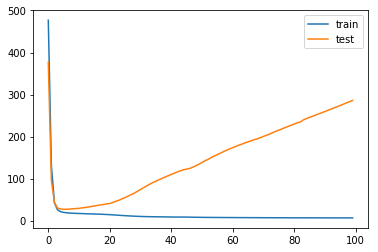

In [29]:
plt.plot(all_losses_train,label = 'train')
plt.plot(all_losses_test,label = 'test')
plt.legend()
plt.show()

Jak widać, zbyt długie uczenie prowadzi do modelu, który świetnie radzi sobie na zbiorze treningowym, ale traci zdolność do generalizacji.

### Klasyfikacja - funkcja softmax

Wyobraźmy sobie, że chcemy rozwiązać problem klasyfikacji $n$-klasowej za pomocą sieci neuronowej. W obecnej formie, na wyjściu dostajemy przekształcenie liniowe z ostatniej warstwy ukrytej na warstwę wyjściową (o rozmiarze $n$).  
Aby móc dokonać musimy posiadać jakiś mechanizm zamieniający liniowe wyjście z naszej sieci ($(x_1, x_2, \ldots, x_n)$) na wektor prawdopodobieństw ($(p_1, p_2, \ldots, p_n)$). Założenie jest takie, że duże wartości wyjścia mają przechodzić na prawdopodobieństwo bliskie 1, a małe (mocno ujemne) - na wartości bliskie 0. Dodatkowo, prawdopodobieństwa wszystkich klas muszą się sumować do 1. Funkcją której szukamy, jest funkcja softmax.

Funkcję **softmax** definiujemy następująco - jest to wektor, którego $j$-ta współrzędna wygląda następująco:

$$\sigma(x)_j = p_j =  \frac{\exp{x_j}}{\sum_{i=1}^n \exp{x_i}}$$

Widzimy, że funkcja skonstruowana jest w taki sposób, aby spełniać powyższe warunki - najpierw za pomocą funkcji wykładniczej przekształcamy każdy element na przedział $(0, \infty)$, a następnie dzielimy przez sumę wszystkich elementów. Dzięki temu dostajemy wartości z zakresu $(0, 1)$ sumujące się do 1.

** Zadanie ** - implementacja funkcji `softmax`

In [30]:
# implementacja:
def softmax(x):
    # x - np.array o rozmiarze (N,)
    exp_x = np.exp(x)
    return  exp_x / exp_x.sum() 

Mamy już mapowanie które z wartości rzeczywistych $(x_1, x_2, \ldots, x_n)$ tworzy nam prawdopodobieństwa $(p_1, p_2, \ldots, p_n)$. Potrzebujemy jeszcze funkcji, która oceni to, jak dobrze prawdopodobieństwa odpowiadają prawdziwym wartościom $(y_1, y_2, \ldots, y_n)$ (zakładamy tutaj, że labelki mamy w postaci *one-hot*).  
Znamy już taką funkcję - jest to *log loss*. Tutaj wprowadzimy jej wieloklasową definicję:

$$
L(p, y) = - \sum_{i=1}^{n}(y_i \cdot \log(p_i))
$$

In [32]:
from sklearn.metrics import log_loss

In [33]:
x_example = np.array((1, 3, 5)).reshape(1, 3)
y_example = np.array((0,0,1)).reshape(1, 3)
y_example_bad = np.array((1,0,0)).reshape(1, 3)
print(log_loss(y_pred=softmax(x_example), y_true=y_example))
print(log_loss(y_pred=softmax(x_example), y_true=y_example_bad))

0.1429316284998995
4.142931628499899


Ostatnim elementem układanki jest pochodna naszej funkcji straty po wartościach wejściowych $(x_1, x_2, \ldots, x_n)$. Warto tutaj zwrócic uwagę, że policzenie tej pochodnej jest odrobine bardziej skomplikowane, niż się wydaje (ale wciąż proste).  

Interesuje nas pochodna 
$$ \frac{\partial L}{\partial x_i} $$

Zauważmy, że $L$ zależy od każdego z $p_j$, a z kolei każde z $p_j$ zależy od naszego z $x_i$ (poprzez czynnik normujący). Możemy więc zapisać naszą funkcję w następujący sposób:

$$ L(p_1(x_i), p_2(x_i), \ldots, p_n(x_i)) $$

(oczywiście prawdopodobieństwa $p$ zależą też od pozostałych elementów $x$, ale tutaj upraszczamy zapis, aby móc czytelnie przedstawić naszą zależność.  

Pamiętamy z podstaw analizy, że w tej sytuacji pochodna funkcji $L$ po $x_i$ to 

$$ \frac{\partial L}{\partial p_1} \frac{\partial p_1}{\partial x_i} + \frac{\partial L}{\partial p_2} \frac{\partial p_2}{\partial x_i} + \ldots + \frac{\partial L}{\partial p_3} \frac{\partial p_3}{\partial x_i}  = \sum_{j=1}^n \frac{\partial L}{\partial p_j} \frac{\partial p_j}{\partial x_i}$$

Widać więc, co musimy policzyć - są to pochodne $\frac{\partial L}{\partial p_j}$ oraz $\frac{\partial p_j}{\partial x_i}$, przy czym ta druga rozbija się na dwa przypadki - gdy $i=j$ i gdy $i \neq j$

#### Najpierw liczymy pochodną $\frac{\partial L}{\partial p_j}$.  
Zauważmy, że funkcja $L$ składa się z $n$ czynników, z czego tylko jeden zależy od $p_j$ - tylko on da nam więc niezerową pochodną.


$$
\frac{\partial L}{\partial p_j} = - \frac{\partial y_j \cdot \log(p_j)}{\partial p_j} = - \frac{y_j}{p_j}
$$

<br>

#### Następnie policzymy pochodną $\frac{\partial p_j}{\partial x_i}$ gdy $i=j$.

<br>

Podstawmy $p_j$ zgodnie ze wzorem, a następnie zastosujmy wzór na różniczkowanie pierwiastka:


$$
\frac{\partial p_i}{\partial x_i} = \frac{\partial}{\partial x_i} \frac{\exp{x_i}}{\sum_{k=1}^n \exp{x_k}} = 
\frac{\exp{x_i} \cdot \sum_{k=1}^n \exp{x_k} - \exp{x_i} \cdot \exp{x_i}}{\sum_{k=1}^n \exp{x_k} \cdot \sum_{k=1}^n \exp{x_k}} =
\frac{\exp{x_i} \cdot(\sum_{k=1}^n \exp{x_k} - \exp{x_i})}{\sum_{k=1}^n \exp{x_k} \cdot \sum_{k=1}^n \exp{x_k}}
$$

Skorzystaliśmy tutaj z podobnego faktu co wcześniej - wyrażenie $\sum_{k=1}^n \exp{x_k}$ składa się z $n$ czynników, z których tylko jeden zależy od $x_i$ - i jego pochodna jest równa 1.


Teraz możemy rozbić nasz wynik na kilka mniejszych wyrażeń:

$$
\frac{\exp{x_i} \cdot(\sum_{k=1}^n \exp{x_k} - \exp{x_i})}{\sum_{k=1}^n \exp{x_k} \cdot \sum_{k=1}^n \exp{x_k}} = \frac{\exp{x_i} }{\sum_{k=1}^n \exp{x_k}} \frac{\sum_{k=1}^n \exp{x_k} - \exp{x_i}}{\sum_{k=1}^n \exp{x_k}} 
= \frac{\exp{x_i} }{\sum_{k=1}^n \exp{x_k}} \left(\frac{\sum_{k=1}^n \exp{x_k}}{\sum_{k=1}^n \exp{x_k}}  - \frac{\exp{x_i}}{\sum_{k=1}^n \exp{x_k}}  \right)
$$


W tym momencie doznajemy olśnienia - przecież te wyrażenia to wzory na $p_i$! Całe wyrażenie upraszcza się więc do   
  
$$ p_i (1 - p_i) .$$ 

#### Ostatni krok - pochodna $\frac{\partial p_j}{\partial x_i}$ gdy $i \neq j$. 

<br>

Tutaj wyrażenie upraszcza się jeszcze bardziej, po pochodna licznika ($x_j$) po $x_i$ jest równa 0:

$$
\frac{\partial p_j}{\partial x_i} = \frac{\partial}{\partial x_i} \frac{\exp{x_j}}{\sum_{k=1}^n \exp{x_k}} = 
\frac{- \exp{x_j} \cdot \exp{x_i}}{\sum_{k=1}^n \exp{x_k} \cdot \sum_{k=1}^n \exp{x_k}} 
$$

Po rozbiciu wyniku na dwa pierwiastki dostajemy:

$$
\frac{- \exp{x_j} \cdot \exp{x_i}}{\sum_{k=1}^n \exp{x_k} \cdot \sum_{k=1}^n \exp{x_k}}  = 
-\frac{\exp{x_j} }{\sum_{k=1}^n \exp{x_k} } \cdot \frac{\exp{x_i}}{\sum_{k=1}^n \exp{x_k}} =
-p_i \cdot p_j
$$

#### Możemy teraz złożyć całość do kupy

$$ \frac{\partial L}{\partial x_i} = \sum_{j=1}^n \frac{\partial L}{\partial p_j} \frac{\partial p_j}{\partial x_i}  = \sum_{j=1}^n -\frac{y_j}{ p_j} \frac{\partial p_j}{\partial x_i} = 
-\frac{y_i}{ p_i}\frac{\partial p_i}{\partial x_i} + \sum_{j \neq i}-\frac{y_j}{ p_j} \frac{\partial p_j}{\partial x_i} $$

<br>

Rozbiliśmy tutaj ostatnią sumę na dwa wyrażenia, abysmy mogli podstawić obie policzone wcześniej pochodne.

<br>

$$
-\frac{y_i}{ p_i}\frac{\partial p_i}{\partial x_i} + \sum_{j \neq i}-\frac{y_j}{ p_j} \frac{\partial p_j}{\partial x_i} = -\frac{y_i}{ p_i} p_i(1-p_i) + \sum_{j \neq i}-\frac{y_j}{ p_j} (-p_i \cdot p_j) 
$$

Widzimy, że trochę się poskraca:

$$
-\frac{y_i}{ p_i} p_i(1-p_i) + \sum_{j \neq i}-\frac{y_j}{ p_j} (-p_i \cdot p_j)  = 
-y_i(1-p_i) + \sum_{j \neq i} y_j \cdot p_i =
-y_i + p_i \cdot y_i + p_i \sum_{j \neq i}y_j 
$$

<br>

Ostatnie dwa wyrażenie możemy znowu włączyć pod jedną sumę:
$$
-y_i + p_i \cdot y_i + p_i \sum_{j \neq i}y_j 
-y_i + p_i \cdot \sum_{i=1}^n y_j  = p_i - y_i
$$

#### Mamy więc ostateczny wzór na pochodną funkcji straty po i-tej współrzędnej wektora **x**

**Przepis jest prosty - od prawdopodobieństwa klasy $i$ odejmujemy wartość indykatora tej klasy.** Ma to intuicyjne wytłumaczenie - jeśli prawdopodobieństwo klasy $k$ jest duże, i ta obserwacja faktycznie pochodzi z klasy $k$, to pochodna powinna być bliska 0. Jeśli natomiast prawdopodobieństwo nie zgadza się z prawdziwą klasą, to pochodna jest istotnie niezerowa.

** Zadanie ** : zaimplementuj funkcję, która zrealizuje zaaplikowania funkcji softmax oraz policzenia na otrzymanych prawdopodobieństwach funkcję straty *log_loss*. 

In [34]:
def softmax_loss_with_gradient(x, y):
    """
    Oblicza funkcję straty log_loss z użyciem funkcji softmax dla macierzy predykcji liniowych `x` oraz 
    prawdziwych wartości y
    
    Wartości wejściowe:
    - x: dane wejściowe - np.array o wymiarach (N, M)
    - y: wektor indykatorów prawdziwych klas (czyli one-hot) - np.array o wymiarach (N, M)
    
    Wartości zwracane:
    - loss: wartość funkcji straty
    - dx: pochodna funkcji straty po x
    """
    
    # najpierw przetransformuj kazdy wiersz x za pomocą funkcji softmax
    #probs = np.exp(x )
    probs = np.exp(x - np.max(x, axis=1, keepdims=True))
    probs /= np.sum(probs, axis=1, keepdims=True)
    
    # następnie oblicz log_loss na całym zbiorze
    N = x.shape[0]
    loss = -np.sum(np.log(probs + 1e-15) * y) / N # log loss uśredniony
    
    # na koniec oblicz pochodną po x zgodnie z powyższym wzorem
    dx = probs.copy()
    dx -= y
    dx /= N # również musimy uśrednić
    
    return loss, dx

In [ ]:
# testy

In [35]:
x_example = np.array((2, 3, 5)).reshape(1, 3)
y_example = np.array((0,0,1)).reshape(1, 3)
loss_scikit = log_loss(y_pred=softmax(x_example), y_true=y_example)
loss_ours, grad = softmax_loss_with_gradient(x_example, y_example)

In [36]:
print(loss_scikit - loss_ours)

1.1934897514720433e-15


In [37]:
print(grad)

[[ 0.04201007  0.1141952  -0.15620527]]


### Możemy zbudować klasyfikator 

In [39]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
X_digits, y_digits = load_digits(n_class=10, return_X_y=True)

X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits)

In [40]:
import pandas as pd

In [41]:
# labelki muszą być w formacie kategorycznym
y_digits_train_ohe = pd.get_dummies(y_digits_train).values
y_digits_test_ohe = pd.get_dummies(y_digits_test).values

**Zadanie** - w sposób analogiczny do poprzednich przykładów zbuduj klasyfikator który będzie rozpoznawał cyfry.

In [42]:
scaler = StandardScaler()
X_digits_train_scaled = scaler.fit_transform(X_digits_train)
X_digits_test_scaled = scaler.transform(X_digits_test)

In [43]:
learning_rate=0.1

hidden_size = 20
batch_size = 64
w1 = np.random.normal(size=(X_digits_train_scaled.shape[1], hidden_size), scale=0.001)
b1 = np.random.normal(size=(hidden_size,), scale=0.001)

w2 = np.random.normal(size=(hidden_size, 10), scale=0.001)
b2 = np.random.normal(size=(10,), scale=0.001)

for i in range(20):
    losses = []
    for x_batch, y_batch in batch_generator(X_digits_train_scaled, y_digits_train_ohe):
    
        out_1, cache_1 = fc_forward(x_batch, w1, b1)
        relu_1, relu_cache_1 = relu_forward(out_1)
        out_2, cache_2 = fc_forward(relu_1, w2, b2)
        loss, dloss = softmax_loss_with_gradient(out_2, y_batch)
        losses.append(loss)
        # backward pass

        dx_2, dw_2, db_2 = fc_backward(dloss, cache_2)
        drelu = relu_backward(dx_2, relu_cache_1)
        dx_1, dw_1, db_1 = fc_backward(drelu, cache_1)

        w1 -= dw_1 * learning_rate
        b1 -= db_1 * learning_rate

        w2 -= dw_2 * learning_rate
        b2 -= db_2 * learning_rate


    print('Total loss: %s' % np.mean(losses))
        
test_hidden_1, _ = fc_forward(X_digits_test_scaled, w1, b1)
test_relu_1, _ = relu_forward(test_hidden_1)
test_predictions, _ = fc_forward(test_relu_1, w2, b2)
test_loss, _ = softmax_loss_with_gradient(test_predictions, y_digits_test_ohe)
accuracy = np.mean(test_predictions.argmax(axis=1) == y_digits_test_ohe.argmax(axis=1))

print(test_loss)
print(accuracy)

Total loss: 2.3034264468914962
Total loss: 2.2976665733861856
Total loss: 2.1492145116141437
Total loss: 1.5149453028291684
Total loss: 0.7893097405330862
Total loss: 0.45742601680860856
Total loss: 0.3110970590212715
Total loss: 0.225483378430067
Total loss: 0.1765801925562757
Total loss: 0.146301099466911
Total loss: 0.12555126352530177
Total loss: 0.11007261709392074
Total loss: 0.0978924083966074
Total loss: 0.0879656306420039
Total loss: 0.07953942640792025
Total loss: 0.07235771373488836
Total loss: 0.06601649514155167
Total loss: 0.06054097049329948
Total loss: 0.05560136346853246
Total loss: 0.051284718291876016
0.12190162635544326
0.9622222222222222
